In [1]:
RunningInCOLAB = 'google.colab' in str(get_ipython())

if RunningInCOLAB:
    print('Downloading packages')
    !pip install slycot
    !pip install control

# This code was convert from matlab to python 
# The orginal source of this code was https://lpsa.swarthmore.edu/Convolution/Convolution.html
# To learn how to convert matlab to python here are some helpful links https://numpy.org/doc/stable/user/numpy-for-matlab-users.html
## The following code generated our input vs time graph for a function

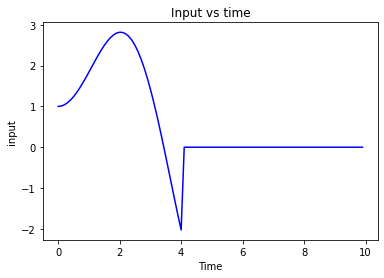

In [2]:
from control.timeresp import impulse_response
from control.matlab import *
import numpy as np
import matplotlib.pyplot as plt
from math import sin
%matplotlib inline

DT = 0.1
DT1 = 0.8
DT2 = 0.3

t = np.arange(0,10,DT)
t1 = np.arange(0,10,DT1)
t2 = np.arange(0,10,DT2)
F = []
for i in range(len(t)):

  f = (sin(t[i]) * t[i] + 1) * (t[i]<4.1) 
  F.append(f)

F1 = []
for i in range(len(t1)):

  f = (sin(t1[i]) * t1[i] + 1) * (t1[i]<4.1) 
  F1.append(f)

F2 = []
for i in range(len(t2)):

  f = (sin(t2[i]) * t2[i] + 1) * (t2[i]<4.1) 
  F2.append(f)

sys = tf(1,[1,1,1])
plt.plot(t,F,'b')
plt.xlabel('Time')
plt.ylabel('input')
plt.title('Input vs time')
plt.show()

The following code represents our continous function from above by a discrete function with dt of 0.8

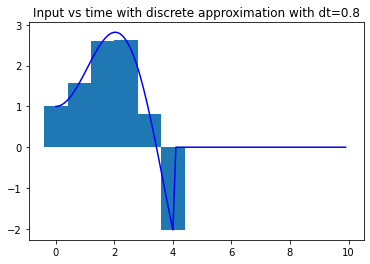

In [3]:
plt.plot(t,F,'b')
plt.bar(t1,F1,0.8)
plt.title('Input vs time with discrete approximation with dt=0.8')
plt.show()

The superposition theorem states that the response of the system to the string of impulses is just the sum of the response to the individual impulses.  The response of the system to the individual impulses with a dt of 0.8 is shown below.

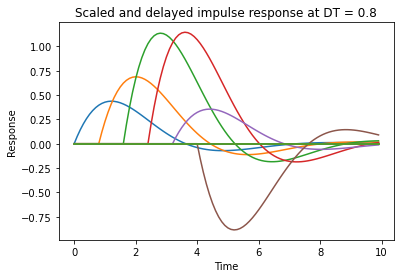

In [4]:
T, h = impulse_response(sys,t)

imp = np.zeros((len(t), len(t1)))

for i in range(len(t1)):
  offset = (i)*round(DT1/DT)
  x = h*F1[i] * DT1
  imp[(offset):len(t),i] = x[0:(len(t) - offset)]
  plt.plot(t,imp[:,i])
plt.xlabel('Time')
plt.ylabel('Response')
plt.title('Scaled and delayed impulse response at DT = 0.8')
plt.show()

The summed response is shown in the graph below

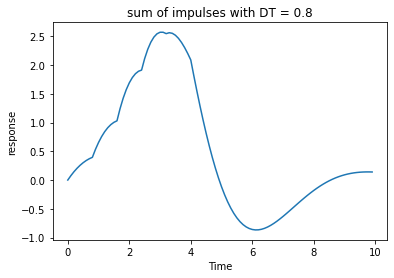

In [5]:
approx = np.sum(imp,1)
plt.plot(t,approx)
plt.title('sum of impulses with DT = 0.8')
plt.xlabel('Time')
plt.ylabel('response')
plt.show()

The summed response is shown in the graph below but this time with a dt of 0.3. We can see that the respose with a dt of 0.3 looks better than the 0.8 graph due to being sampled more. 

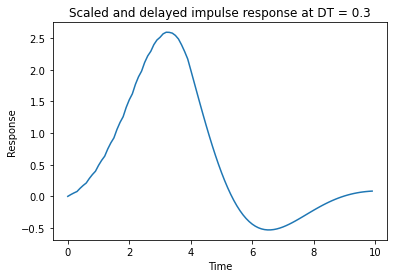

In [6]:
imp2 = np.zeros((len(t), len(t2)))
for i in range(len(t2)):
  offset = (i)*round(DT2/DT)
  x = h*F2[i] * DT2
  imp2[(offset):len(t),i] = x[0:(len(t) - offset)]

approx2 = np.sum(imp2,1)
plt.plot(t,approx2)
plt.xlabel('Time')
plt.ylabel('Response')
plt.title('Scaled and delayed impulse response at DT = 0.3')
plt.show()

The graph below shows the "exact" response along with the response solved by using lsim and convolve functions from matlab.

/Users/gregglickert/opt/anaconda3/envs/controls/lib/python3.7/site-packages/control/timeresp.py:918: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  "return_x specified for a transfer function system. Internal "


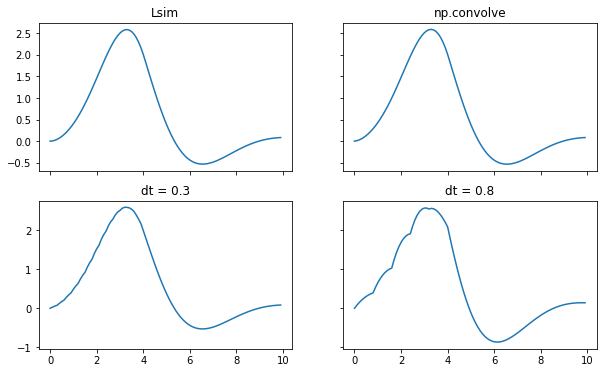

In [19]:
solved = lsim(sys,F,t)
solved_again = np.convolve(F,h)*DT

fig, ax = plt.subplots(2, 2, sharex='col', sharey='row',figsize=(10, 6))
ax[0,0].plot(t,solved[0],label='exact')
ax[0,0].title.set_text('Lsim')
ax[0,1].plot(t,solved_again[0:len(t)],label='np.convolve')
ax[0,1].title.set_text('np.convolve')
ax[1,0].plot(t,approx2, label='DT = 0.3')
ax[1,0].title.set_text('dt = 0.3')
ax[1,1].plot(t,approx, label='DT = 0.8')
ax[1,1].title.set_text('dt = 0.8')
plt.show()

# we can see that our summed inpluse reponses match very well with the np.convolve function and the Lsim function